In [1]:
import pandas as pd
import numpy  as np
import matplotlib as plt
import seaborn as sbn
from datetime import datetime as dt

In [25]:

#dfGenEdad = pd.read_csv("fiuba_2_postulantes_genero_y_edad.csv", dtype=dTypes)
#dfAvisos = pd.read_csv("fiuba_5_avisos_online.csv")
dfAvisosDet = pd.read_csv("fiuba_6_avisos_detalle.csv")
#dfPostu = pd.read_csv("fiuba_4_postulaciones.csv")
dfVistas = pd.read_csv("fiuba_3_vistas.csv")
#dfEdu = pd.read_csv("fiuba_1_postulantes_educacion.csv")

In [59]:
dfVistas.head(5)

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd
3,1112318643,2018-02-23T13:38:17.921-0500,OqmP9pv
4,1111903673,2018-02-23T13:38:18.973-0500,DrpbXDP


In [3]:
#sumo cantidad de vistas x postulante
dfVistasXPost = dfVistas["idpostulante"].value_counts().reset_index()
#filtro perosnas q tengan mas de 20 vistas
#luego cuento cantidad de personas q tienen misma cantidad de vistas
dfVistasXPost=dfVistasXPost.loc[dfVistasXPost["idpostulante"]>20].groupby("idpostulante").count()
#fitro de tal manera q solo me queden cantidad de personas con cantidad de vistas >3
dfVistasXPost=dfVistasXPost.loc[dfVistasXPost["index"]>3]
#queda x ej: hay 876 personas con 21 vistas (en los dias q nos dieron)
dfVistasXPost

In [19]:
dfVistas.sort_values("timestamp",ascending = False)

,idAviso,timestamp,idpostulante,dia,hora
952792,1112358588,2018-03-01 04:59:56.812,QNaVrq2,2018-03-01,4
961565,1112302327,2018-03-01 04:59:56.142,KBaK1am,2018-03-01,4
958984,1112367073,2018-03-01 04:59:55.636,NzrEP4z,2018-03-01,4
961865,1112320214,2018-03-01 04:59:55.535,MV6jJdK,2018-03-01,4
961896,1112345900,2018-03-01 04:59:55.409,ekmNzBW,2018-03-01,4
959381,1112367073,2018-03-01 04:59:54.532,NzrEP4z,2018-03-01,4
961895,1112305277,2018-03-01 04:59:52.754,A3DraY1,2018-03-01,4
959380,1112346945,2018-03-01 04:59:50.844,vVjR5Kx,2018-03-01,4
961208,1112346945,2018-03-01 04:59:49.344,vVjR5Kx,2018-03-01,4
961864,1111344452,2018-03-01 04:59:48.212,wVkZ24p,2018-03-01,4


In [23]:
x = dfVistasXPost.plot(title = "Eje y es cantidad de postulantes, que tienen eje x cantidad de vistas")
x.set_xlabel("cantidad de vistas de cada uno")
x.set_ylabel("cantidad de postulantes")

,index
idpostulante,
21,876
22,742
23,691
24,687
25,594
26,519
27,477
28,458
29,421


In [32]:
dfVistas.rename(columns = {"idAviso":"idaviso"},inplace=True)

In [33]:
dfVistosDet = pd.merge(dfVistas,dfAvisosDet,how="left",on="idaviso")
dfVistosDet

,idaviso,timestamp,idpostulante,dia,hora,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,1111780242,2018-02-23 18:38:13.187,YjVJQ6Z,2018-02-23,18,1,"OPERARIO PARA DEPOSITO, CONFECCION DE PEDIDOS,...",<p>SE NECESITA OPERIARIO PARA DEPOSITO CONFECC...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Programación de producción,dm
1,1112263876,2018-02-23 18:38:14.296,BmVpYoR,2018-02-23,18,1,Administrador Semi Senior-Linux,"<p><strong><span style="""">Stefanini IT Solutio...",Capital Federal,NaN,Santa Isabel,Full-time,Senior / Semi-Senior,Infraestructura,Stefanini Argentina SRL
2,1112327963,2018-02-23 18:38:14.329,wVkBzZd,2018-02-23,18,1,Community Manager,<p>En<strong> Adecco Tecnología </strong>proye...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Community Management,Adecco -Región Office
3,1112318643,2018-02-23 18:38:17.921,OqmP9pv,2018-02-23,18,1,Analista Jr. de Back Office,"<p><strong>PROSEGUR,</strong> Empresa Multinac...",Gran Buenos Aires,NaN,NaN,Full-time,Junior,Administración,Prosegur S.A.
4,1111903673,2018-02-23 18:38:18.973,DrpbXDP,2018-02-23,18,1,Empleado de depósito de farmacia,"<p> </p><div><p>Farmacias Central Oeste, empre...",Gran Buenos Aires,NaN,NaN,Full-time,Otro,Farmacéutica,Farmacias Central Oeste
5,1112355613,2018-02-23 18:38:23.467,rmdWApz,2018-02-23,18,1,Asistente Administrativa&Dirección.,Empresa Desarrolladora Inmobiliaria selecciona...,Gran Buenos Aires,NaN,NaN,Full-time,Otro,Administración,Impulsando Lideres
6,1112346704,2018-02-23 18:38:27.130,Dr6e6Xl,2018-02-23,18,1,Recepcionista Adm.,<p><strong>Adecco Office</strong> está especia...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Recepcionista,Adecco - Región NORTE & OESTE GBA
7,1112282610,2018-02-23 18:38:27.670,A3R9GWl,2018-02-23,18,1,Administrativo de Facturación (temporal),<p>Importante empresa textil busca:</p><p>ADMI...,Gran Buenos Aires,NaN,NaN,Full-time,Junior,Administración,Silvia Baena Consultora
8,1112342544,2018-02-23 18:38:31.601,8M24rbM,2018-02-23,18,1,Atención al cliente,<p>Importante hipermercado se encuentra en la ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Atención al Cliente,Grupo Gestión
9,1112358408,2018-02-23 18:38:32.977,YjrD1ZZ,2018-02-23,18,1,"VENDEDORA PARA BOMBONERIA, BUENA PRESENCIA",<p>VENDEDORA PARA BOMBONERIA EN CABA Y PROVINC...,Gran Buenos Aires,NaN,NaN,Full-time,Otro,Ventas,Sweet House


In [38]:
colTemp = dfAvisosDet.filter(items=("nombre_area","idaviso")).groupby("nombre_area").count().sort_values("idaviso",ascending = False)
colTemp = colTemp.loc[colTemp["idaviso"]>20]
colTemp

,idaviso
nombre_area,
Ventas,1659
Comercial,983
Administración,901
Producción,821
Programación,576
Contabilidad,416
Tecnologia / Sistemas,388
Atención al Cliente,347
Mantenimiento,324


In [39]:
otraColTemp = dfVistosDet.filter(items=("nombre_area","idaviso")).groupby("nombre_area").count().sort_values("idaviso",ascending = False)
otraColTemp

,idaviso
nombre_area,
Ventas,128025
Administración,102812
Producción,64485
Comercial,58885
Atención al Cliente,49203
Recepcionista,48756
Call Center,33344
Telemarketing,25258
Tesorería,23682


In [40]:
colTemp = (otraColTemp/colTemp).sort_values("idaviso",ascending = False).dropna()
colTemp

,idaviso
nombre_area,
Recepcionista,322.887417
Secretaria,278.608696
Asistente,276.318182
Camareros,263.500000
Telemarketing,183.028986
Call Center,174.575916
Tesorería,172.861314
Farmacéutica,170.853333
Community Management,169.190476


Text(0,0.5,'Cantidad de postulaciones')

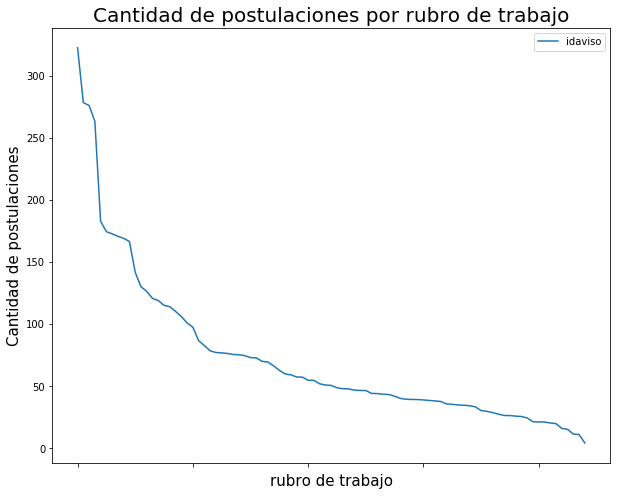

In [41]:
x = colTemp.plot(figsize=(10,8))
x.set_title("Cantidad de vistas por rubro de trabajo",fontsize=20)
x.set_xlabel('rubro de trabajo',fontsize=15)
x.set_ylabel('Cantidad de vistas',fontsize=15)

Text(0,0.5,'Cantidad de postulaciones')

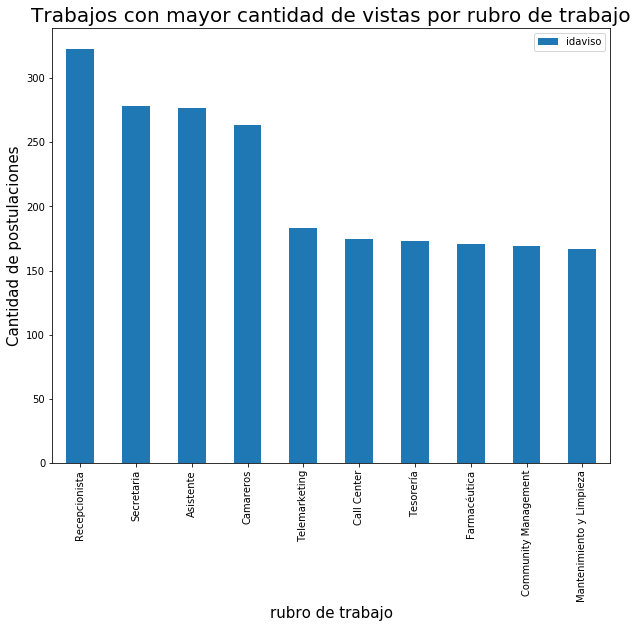

In [43]:
x = colTemp.head(10).plot(kind="bar",figsize=(10,8))
x.set_title("Trabajos con mayor cantidad de vistas por rubro de trabajo",fontsize=20)
x.set_xlabel('rubro de trabajo',fontsize=15)
x.set_ylabel('Cantidad de vistas',fontsize=15)

se puede ver la similitud con el mismo grafico en realazion a postulaciones (ofertaVsDemanda)

Text(0,0.5,'Cantidad de postulaciones')

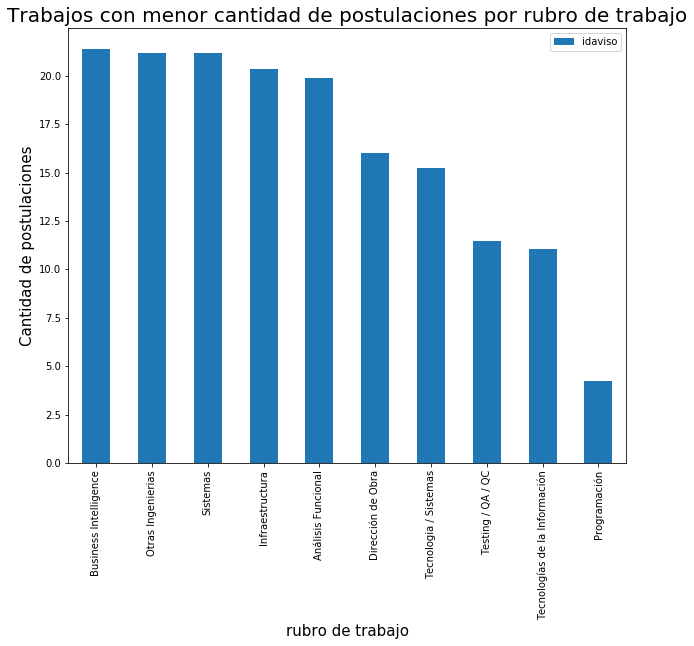

In [44]:
x = colTemp.tail(10).plot(kind="bar",figsize=(10,8))
x.set_title("Trabajos con menor cantidad de vistas por rubro de trabajo",fontsize=20)
x.set_xlabel('rubro de trabajo',fontsize=15)
x.set_ylabel('Cantidad de vistas',fontsize=15)

In [55]:
colTemp = dfAvisosDet.filter(items=("tipo_de_trabajo","idaviso")).groupby("tipo_de_trabajo").count().sort_values("idaviso",ascending = False)
colTemp = colTemp.loc[colTemp["idaviso"]>20]
colTemp

,idaviso
tipo_de_trabajo,
Full-time,12339
Part-time,863
Teletrabajo,110
Pasantia,63
Por Horas,63
Temporario,42
Por Contrato,37


In [56]:

otraColTemp = dfVistosDet.filter(items=("tipo_de_trabajo","idaviso")).groupby("tipo_de_trabajo").count().sort_values("idaviso",ascending = False)
otraColTemp


,idaviso
tipo_de_trabajo,
Full-time,835421
Part-time,109022
Por Horas,5356
Pasantia,4360
Temporario,3182
Teletrabajo,2981
Fines de Semana,846
Por Contrato,727
Primer empleo,2


In [58]:
colTemp = (otraColTemp/colTemp).sort_values("idaviso",ascending = False).dropna()
colTemp.to_csv("vistos_por_tdt.csv")
colTemp

,idaviso
tipo_de_trabajo,
Full-time,12339.0
Part-time,863.0
Teletrabajo,110.0
Pasantia,63.0
Por Horas,63.0
Temporario,42.0
Por Contrato,37.0


Text(0,0.5,'Cantidad de postulaciones')

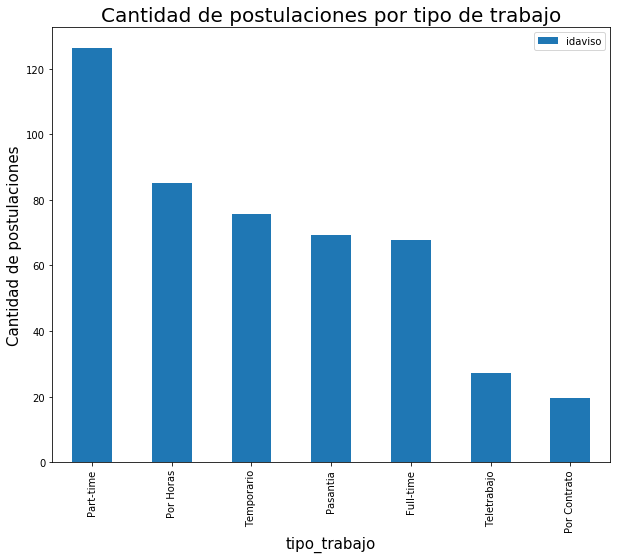

In [49]:
x = colTemp.plot(kind="bar",figsize=(10,8))
x.set_title("Cantidad de postulaciones por tipo de trabajo",fontsize=20)
x.set_xlabel('tipo_trabajo',fontsize=15)
x.set_ylabel('Cantidad de postulaciones',fontsize=15)

In [50]:
colTemp = dfAvisosDet.filter(items=("nivel_laboral","idaviso")).groupby("nivel_laboral").count().sort_values("idaviso",ascending = False)
colTemp = colTemp.loc[colTemp["idaviso"]>20]
colTemp = colTemp.drop("Otro")
colTemp

,idaviso
nivel_laboral,
Senior / Semi-Senior,9407
Junior,2216
Jefe / Supervisor / Responsable,809
Gerencia / Alta Gerencia / Dirección,181


In [52]:
otraColTemp = dfVistosDet.filter(items=("nivel_laboral","idaviso")).groupby("nivel_laboral").count().sort_values("idaviso",ascending = False)
otraColTemp

,idaviso
nivel_laboral,
Senior / Semi-Senior,617012
Junior,216640
Otro,81296
Jefe / Supervisor / Responsable,35658
Gerencia / Alta Gerencia / Dirección,11291


In [53]:
colTemp = (otraColTemp/colTemp).sort_values("idaviso",ascending = False).dropna()
colTemp

,idaviso
nivel_laboral,
Junior,97.761733
Senior / Semi-Senior,65.590730
Gerencia / Alta Gerencia / Dirección,62.381215
Jefe / Supervisor / Responsable,44.076638


Text(0,0.5,'Cantidad de postulaciones')

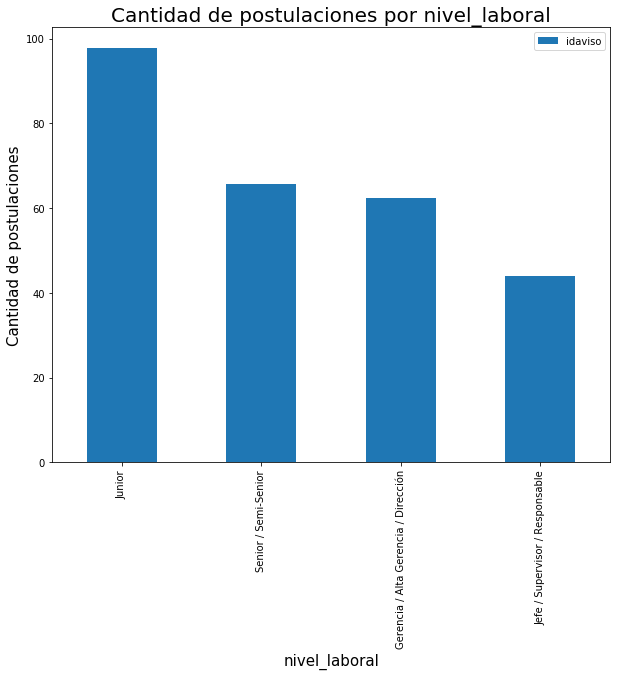

In [54]:
x = colTemp.plot(kind="bar",figsize=(10,8))
x.set_title("Cantidad de postulaciones por nivel_laboral",fontsize=20)
x.set_xlabel('nivel_laboral',fontsize=15)
x.set_ylabel('Cantidad de postulaciones',fontsize=15)